### Loading the data

In [258]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [259]:
data = pd.read_csv('AmesHousing.txt', sep='\t')

In [260]:
data.shape

(2930, 82)

In [261]:
pd.options.display.max_rows = 100

In [262]:
pd.concat([data.dtypes, data.head(3).T, data.tail(3).T], axis=1)

,0,0,1,2,2927,2928,2929
Order,int64,1,2,3,2928,2929,2930
PID,int64,526301100,526350040,526351010,923400125,924100070,924151050
MS SubClass,int64,20,20,20,85,20,60
MS Zoning,object,RL,RH,RL,RL,RL,RL
Lot Frontage,float64,141,80,81,62,77,74
Lot Area,int64,31770,11622,14267,10441,10010,9627
Street,object,Pave,Pave,Pave,Pave,Pave,Pave
Alley,object,NaN,NaN,NaN,NaN,NaN,NaN
Lot Shape,object,IR1,Reg,IR1,Reg,Reg,Reg
Land Contour,object,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl


In [263]:
train = data.iloc[:1460]
test = data.iloc[1460:]

In [264]:
target = 'SalePrice'

In [265]:
# figuring out which columns are numeric ones
t = train.dtypes
num_cols = t[t != 'object'].index.tolist()[2:]
np.asarray(num_cols)

array(['MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice'],
      dtype='<U15')

In [266]:
less_cols = ['Lot Area', 'Year Built','Year Remod/Add', 
                    'Mas Vnr Area',  'Garage Yr Blt', 'Garage Area',
                    'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice']

In [267]:
#pd.plotting.scatter_matrix(train[less_cols], alpha=0.2, figsize=(14, 14), diagonal='kde')
#plt.show()

In [268]:
import seaborn as sns
sns.set() # applying the default style of seaborn

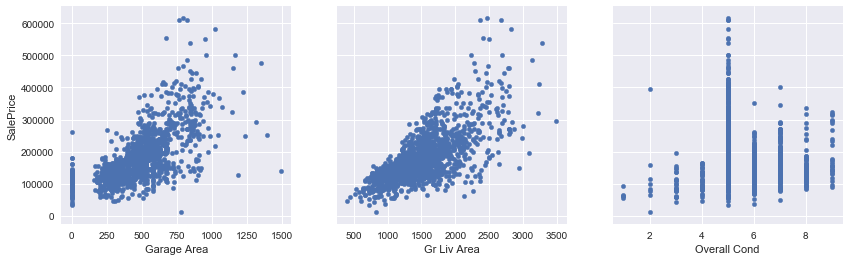

In [269]:
fig, [ax1, ax2, ax3] = plt.subplots(1,3, figsize=(14,4), sharey=True)

train.plot.scatter(x="Garage Area", y="SalePrice", ax=ax1)
train.plot.scatter(x="Gr Liv Area", y="SalePrice", ax=ax2)
train.plot.scatter(x="Overall Cond", y="SalePrice", ax=ax3)

plt.show()

In [270]:
train[['Garage Area', 'Gr Liv Area', 'Overall Cond', 'SalePrice']].corr()

,Garage Area,Gr Liv Area,Overall Cond,SalePrice
Garage Area,1.000000,0.465366,-0.132401,0.662397
Gr Liv Area,0.465366,1.000000,-0.133710,0.698990
Overall Cond,-0.132401,-0.133710,1.000000,-0.099395
SalePrice,0.662397,0.698990,-0.099395,1.000000


### Linear regression

In [271]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
model = lr.fit(train[['Gr Liv Area']],
               train['SalePrice'])

In [272]:
a0 = lr.intercept_
a1 = lr.coef_
(a0, a1)

(5366.821710056043, array([116.86624683]))

In [273]:
from sklearn.metrics import mean_squared_error

In [274]:
lr.fit(train[['Gr Liv Area']],
               train['SalePrice'])
train_pred = lr.predict(train[['Gr Liv Area']]) 
test_pred = lr.predict(test[['Gr Liv Area']]) 

train_rmse = (((train_pred - train['SalePrice'])**2).mean())**0.5

test_rmse = np.sqrt(
    mean_squared_error(
        test_pred,
        test['SalePrice']
    )
)

(train_rmse, test_rmse)

(56034.362001412796, 57088.25161263909)

In [275]:
# fitting linear reg with 2 features

cols = ['Overall Cond', 'Gr Liv Area']
lr.fit(train[cols], train['SalePrice'])


train_pred = lr.predict(train[cols]) 
test_pred = lr.predict(test[cols])

train_rmse_2 = np.sqrt(
    mean_squared_error(
        train_pred,
        train['SalePrice']
    )
)

test_rmse_2 = np.sqrt(
    mean_squared_error(
        test_pred,
        test['SalePrice']
    )
)

(train_rmse_2, test_rmse_2)

(56032.398015258674, 57066.90779448559)

#### Feature selection

In [276]:
train.dtypes.value_counts()

object     43
int64      28
float64    11
dtype: int64

In [277]:
# leaving only numerical colummns

numerical_train = train.select_dtypes(include=['int64', 'float64']).copy()
print(numerical_train.shape)

numerical_train.dtypes.value_counts()

(1460, 39)


int64      28
float64    11
dtype: int64

In [278]:
# dropping not needed columns

cols_to_drop = ['PID', 'Year Built', 'Year Remod/Add', 
                'Garage Yr Blt', 'Mo Sold', 'Yr Sold']

numerical_train.drop(cols_to_drop, axis=1, inplace=True)

In [279]:
numerical_train.dtypes.value_counts()

int64      23
float64    10
dtype: int64

In [280]:
# checking columns with null values

null_series = numerical_train.isnull().sum()
null_series

Order                0
MS SubClass          0
Lot Frontage       249
Lot Area             0
Overall Qual         0
Overall Cond         0
Mas Vnr Area        11
BsmtFin SF 1         1
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
1st Flr SF           0
2nd Flr SF           0
Low Qual Fin SF      0
Gr Liv Area          0
Bsmt Full Bath       1
Bsmt Half Bath       1
Full Bath            0
Half Bath            0
Bedroom AbvGr        0
Kitchen AbvGr        0
TotRms AbvGrd        0
Fireplaces           0
Garage Cars          0
Garage Area          0
Wood Deck SF         0
Open Porch SF        0
Enclosed Porch       0
3Ssn Porch           0
Screen Porch         0
Pool Area            0
Misc Val             0
SalePrice            0
dtype: int64

In [281]:
# leaving only full columns
full_cols_series = null_series[null_series == 0]
full_cols_series.shape

(25,)

In [282]:
train_subset = train[full_cols_series.index]

In [283]:
# correlation between target column and features
sorted_corrs = train_subset.corr()['SalePrice'].abs().sort_values(ascending=False)
sorted_corrs

SalePrice          1.000000
Overall Qual       0.804562
Gr Liv Area        0.698990
Garage Cars        0.663485
Garage Area        0.662397
1st Flr SF         0.657119
Full Bath          0.518194
Fireplaces         0.485683
TotRms AbvGrd      0.483701
Open Porch SF      0.344383
Wood Deck SF       0.319104
Lot Area           0.274730
Half Bath          0.272870
2nd Flr SF         0.202352
Enclosed Porch     0.165873
Pool Area          0.145474
Kitchen AbvGr      0.130843
Bedroom AbvGr      0.106941
Screen Porch       0.100121
Overall Cond       0.099395
MS SubClass        0.088504
Order              0.068181
Low Qual Fin SF    0.060352
3Ssn Porch         0.038699
Misc Val           0.009903
Name: SalePrice, dtype: float64

Selecting only columns with strong corr with target and checing them for potential collinearity with heatmap of their correlation.

In [284]:
strong_corrs = sorted_corrs[sorted_corrs > 0.3]
strong_corrs

SalePrice        1.000000
Overall Qual     0.804562
Gr Liv Area      0.698990
Garage Cars      0.663485
Garage Area      0.662397
1st Flr SF       0.657119
Full Bath        0.518194
Fireplaces       0.485683
TotRms AbvGrd    0.483701
Open Porch SF    0.344383
Wood Deck SF     0.319104
Name: SalePrice, dtype: float64

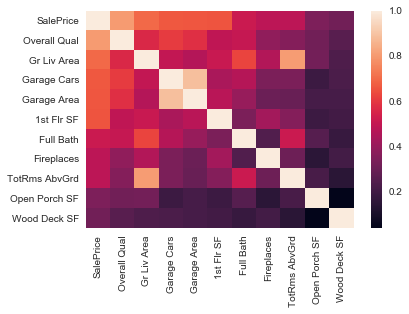

In [285]:
sns.heatmap(train_subset[strong_corrs.index].corr())
plt.show()

These pairs are correlated:  
`Gr Liv Area` and `TotRms AbvGrd`  
`Garage Area` and `Garage Cars`  

Dropping of of each.

In [286]:
final_corr_cols = strong_corrs.drop(['Garage Cars', 'TotRms AbvGrd'])

features = final_corr_cols.drop(['SalePrice']).index.tolist()
target = ['SalePrice']

In [287]:
# checking if test df has no nulls in final column list

test[final_corr_cols.index].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 1460 to 2929
Data columns (total 9 columns):
SalePrice        1470 non-null int64
Overall Qual     1470 non-null int64
Gr Liv Area      1470 non-null int64
Garage Area      1469 non-null float64
1st Flr SF       1470 non-null int64
Full Bath        1470 non-null int64
Fireplaces       1470 non-null int64
Open Porch SF    1470 non-null int64
Wood Deck SF     1470 non-null int64
dtypes: float64(1), int64(8)
memory usage: 103.4 KB


One line in `Garage Area` has null. Let's drop it.

In [288]:
clean_test = test[final_corr_cols.index].dropna()

#### Training and testing a linear regression for selected features.

In [289]:
lr = LinearRegression()
lr.fit(train[features], train[target])

train_pred = lr.predict(train[features])
test_pred = lr.predict(clean_test[features])

train_rmse = np.sqrt(mean_squared_error(train_pred, train[target]))
test_rmse = np.sqrt(mean_squared_error(test_pred, clean_test[target]))
(train_rmse, test_rmse)

(34173.97629185851, 41032.02612019743)

Now let's check features variances. For that we first rescale them (min-max scalling).

In [290]:
scaled_train = (train[features] - train[features].min()) / (train[features].max() - train[features].min())

pd.concat([scaled_train.min(), scaled_train.max()], axis=1)

,0,1
Overall Qual,0.0,1.0
Gr Liv Area,0.0,1.0
Garage Area,0.0,1.0
1st Flr SF,0.0,1.0
Full Bath,0.0,1.0
Fireplaces,0.0,1.0
Open Porch SF,0.0,1.0
Wood Deck SF,0.0,1.0


In [291]:
sorted_vars = scaled_train.var().sort_values()
sorted_vars

Open Porch SF    0.013938
Full Bath        0.018621
Garage Area      0.020347
Gr Liv Area      0.023078
Overall Qual     0.024496
1st Flr SF       0.025814
Wood Deck SF     0.033064
Fireplaces       0.046589
dtype: float64

In [292]:
# setting a cutoff variance of 0.015, remove the `Open Porch SF` feature

features_2 = sorted_vars[sorted_vars > 0.015].index.tolist()

In [293]:
lr.fit(train[features_2], train[target])

train_pred = lr.predict(train[features_2])
test_pred = lr.predict(clean_test[features_2])

train_rmse_2 = np.sqrt(mean_squared_error(train_pred, train[target]))
test_rmse_2 = np.sqrt(mean_squared_error(test_pred, clean_test[target]))
(train_rmse_2, test_rmse_2)

(34372.696707783965, 40591.42702437741)